## Problema # 1

#### Función que permite hacer la binarización de una imagen.

In [2]:
## Importamos Librerías
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
## Cargamos la Imagen
img = cv2.imread("E1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ##Convierte el formato default a BGR

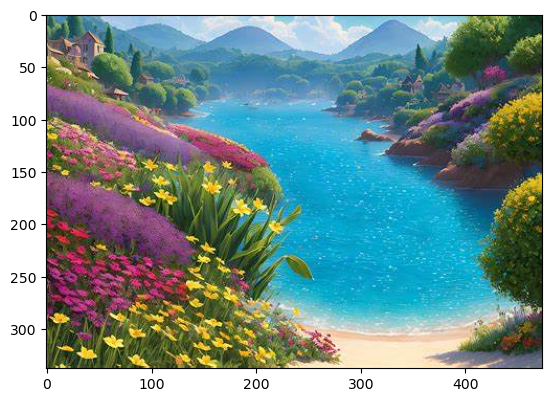

In [4]:
### Mostramos la imagen original
plt.imshow(img)
plt.show()

La imagen binarizada se ha guardado en binarized_image.jpg


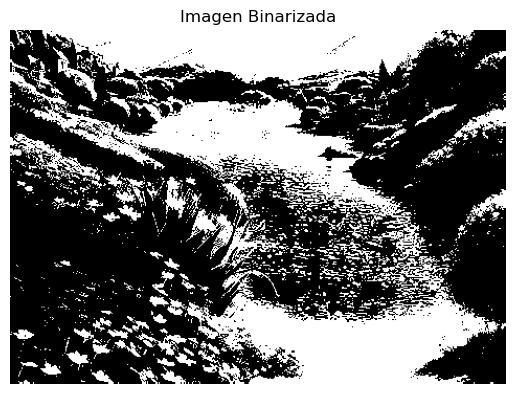

In [11]:
def binarize_image(image_path, threshold=128):
   
    # Cargamos la imagen en escala de grises
    image = cv2.imread("E1.jpg", cv2.IMREAD_GRAYSCALE)
    
    # Aplicamos el umbral para binarización
    _, binarized_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    
    # Guardamos la imagen binarizada
    output_image_path = "binarized_image.jpg"
    cv2.imwrite(output_image_path, binarized_image)
    print(f"La imagen binarizada se ha guardado en {output_image_path}")

# Mostramos la imagen binarizada
    plt.imshow(binarized_image, cmap='gray')
    plt.title('Imagen Binarizada')
    plt.axis('off') 
    plt.show()

if __name__ == "__main__":
    binarize_image("path_to_your_image.jpg")


## Problema # 2

#### Función que dada dos imágenes del mismo tamaño (igual ancho y alto) y a color, realice las operaciones SUMA, RESTA, AND, OR , XOR.

In [15]:
## Importamos Librerías
import cv2
import matplotlib.pyplot as plt 
import numpy as np

Imagen resultante de SUM guardada como SUM.jpg


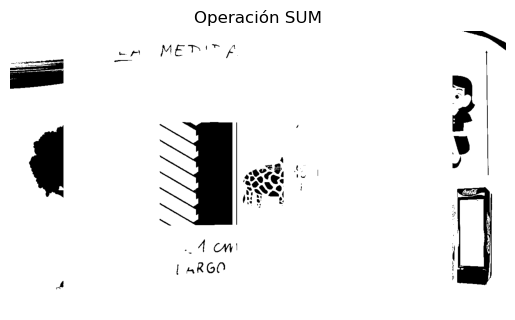

Imagen resultante de SUB guardada como SUB.jpg


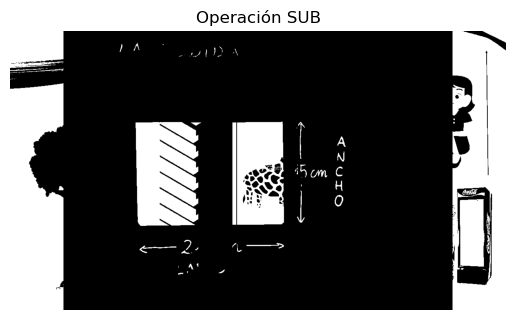

Imagen resultante de AND guardada como AND.jpg


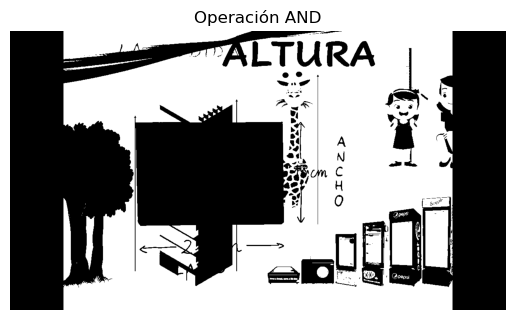

Imagen resultante de OR guardada como OR.jpg


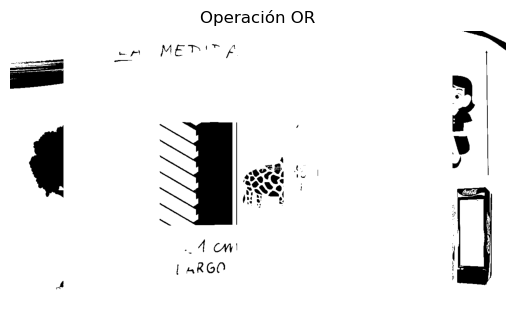

Imagen resultante de XOR guardada como XOR.jpg


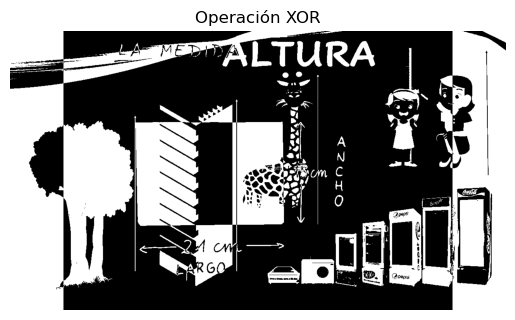

In [17]:
def perform_operations(image1_path, image2_path):

    # Cargar las imágenes
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # Aplica el umbral para binarización
    _, binarized1 = cv2.threshold(image1, 128, 255, cv2.THRESH_BINARY)
    _, binarized2 = cv2.threshold(image2, 128, 255, cv2.THRESH_BINARY)

    # Realiza las operaciones lógicas
    operations = {
        "SUM": cv2.add(binarized1, binarized2),
        "SUB": cv2.subtract(binarized1, binarized2),
        "AND": cv2.bitwise_and(binarized1, binarized2),
        "OR": cv2.bitwise_or(binarized1, binarized2),
        "XOR": cv2.bitwise_xor(binarized1, binarized2)
    }

    for op_name, result in operations.items():
        output_image_path = f"{op_name}.jpg"
        cv2.imwrite(output_image_path, result)
        print(f"Imagen resultante de {op_name} guardada como {output_image_path}")
        
        # Muestra la imagen resultante usando matplotlib
        plt.imshow(result, cmap='gray')
        plt.title(f'Operación {op_name}')
        plt.axis('off')  # Oculta los ejes
        plt.show()

if __name__ == "__main__":
    perform_operations("E2_1.jpg", "E2_2.jpg")


## Problema # 3

#### Función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

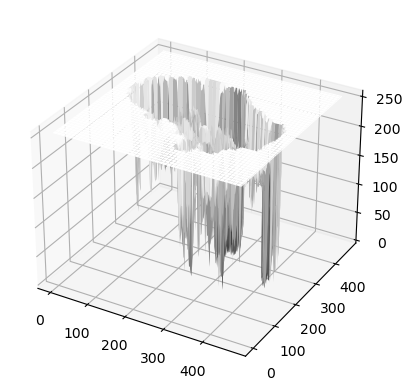

In [25]:
def plot_image_3d(image_path):

    # Carga la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    x = np.arange(image.shape[1])
    y = np.arange(image.shape[0])
    x, y = np.meshgrid(x, y)
    z = image

    # Crea una figura y un eje 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='gray')

    plt.show()

if __name__ == "__main__":
    plot_image_3d("E3.jpg")



## Problema # 4

####  Función para cada una de las transformaciones: negativa, lineal, logarÍtmica y exponencial.

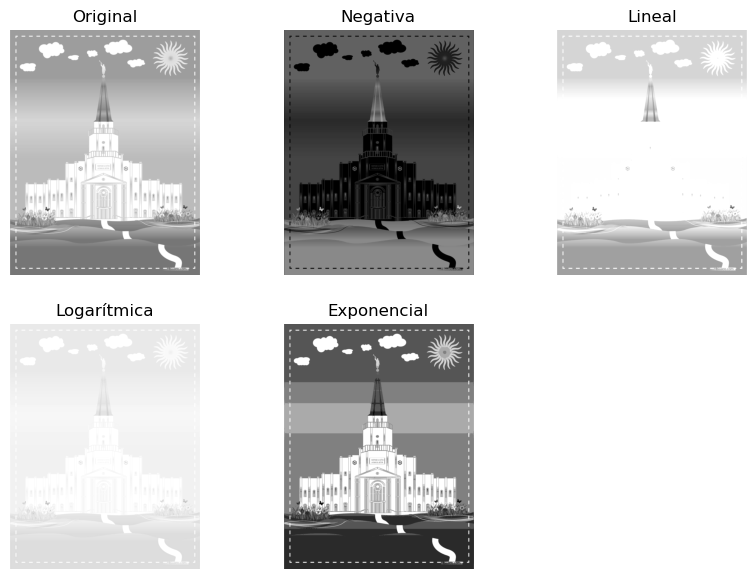

In [28]:
def negative_transformation(image):
    return 255 - image

def linear_transformation(image, a=1.0, b=0):
    return np.clip(a * image + b, 0, 255).astype(np.uint8)

def logarithmic_transformation(image, c=1):
    return np.clip(c * np.log1p(image), 0, 255).astype(np.uint8)

def exponential_transformation(image, c=1, gamma=1):
    return np.clip(c * (image ** gamma), 0, 255).astype(np.uint8)

def apply_transformations(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    neg_image = negative_transformation(image)
    lin_image = linear_transformation(image, a=1.2, b=30)
    log_image = logarithmic_transformation(image, c=45)
    exp_image = exponential_transformation(image, c=0.0001, gamma=2.0)

    transformations = {
        "Original": image,
        "Negativa": neg_image,
        "Lineal": lin_image,
        "Logarítmica": log_image,
        "Exponencial": exp_image
    }
    
    plt.figure(figsize=(10, 7))
    for i, (name, transformed_image) in enumerate(transformations.items(), 1):
        plt.subplot(2, 3, i)
        plt.imshow(transformed_image, cmap='gray')
        plt.title(name)
        plt.axis('off')
    
    plt.show()

if __name__ == "__main__":
    apply_transformations("E4.jpg")


## Problema # 5

####  Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

##### El kernel Laplaceano es una herramienta poderosa para la detección de bordes, especialmente en situaciones donde los bordes son muy pronunciados. Sin embargo, el algoritmo de Canny es generalmente preferido en aplicaciones prácticas debido a su robustez y precisión, aunque a costa de una mayor complejidad computacional.

##### Diferencias Clave:

##### Enfoque:
Laplaceano: Se basa en la segunda derivada de la imagen, detectando cambios bruscos en la intensidad.

Canny: Utiliza un enfoque multi-etapas con un filtro de suavizado inicial y operadores de primer orden para calcular el gradiente y luego aplicar técnicas avanzadas de supresión y umbralización.

##### Sensibilidad al Ruido:
Laplaceano: Más sensible al ruido debido a la segunda derivada. Requiere un pre-procesamiento adicional para suavizar la imagen.

Canny: Incorpora suavizado Gaussiano como parte del algoritmo, lo que lo hace más robusto al ruido.

##### Dirección de Bordes:
Laplaceano: Detecta bordes en todas las direcciones sin distinción.

Canny: Detecta bordes en direcciones específicas, permitiendo un control más fino sobre la detección de bordes.

##### Complejidad Computacional:
Laplaceano: Relativamente sencillo y rápido de calcular.

Canny: Más complejo y computacionalmente más costoso debido a las múltiples etapas involucradas.

##### Resultado:
Laplaceano: Proporciona una detección de bordes más gruesa y ruidosa.

Canny: Proporciona bordes más nítidos y precisos, eliminando los bordes falsos y manteniendo la continuidad de los bordes reales.